# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [35]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [36]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [37]:
y.value_counts()

1    71
0    59
2    48
dtype: int64

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [38]:
model = KMeans(n_clusters=8)
preds = model.fit_predict(X)
centers = model.cluster_centers_
score = silhouette_score(X, preds)
score

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [39]:
model = KMeans(n_clusters=5)
preds = model.fit_predict(X)
centers = model.cluster_centers_
score = silhouette_score(X, preds)
score

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [40]:
model = KMeans(n_clusters=3)
preds = model.fit_predict(X)
centers = model.cluster_centers_
score = silhouette_score(X, preds)
score

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12b7b7490>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

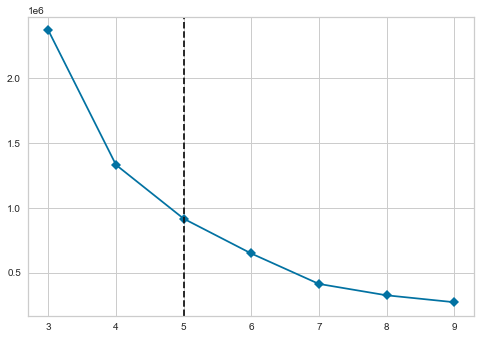

In [46]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,10), metric="distortion", timings=False)
visualizer.fit(X)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12b477c50>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

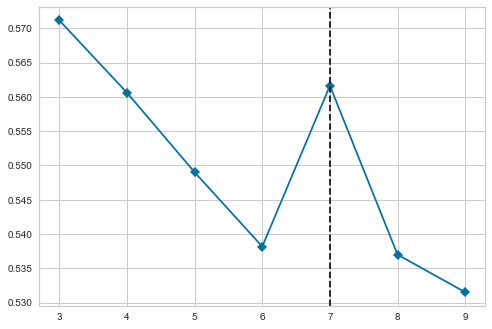

In [48]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,10), metric='silhouette', timings=False)
visualizer.fit(X)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12b209390>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)

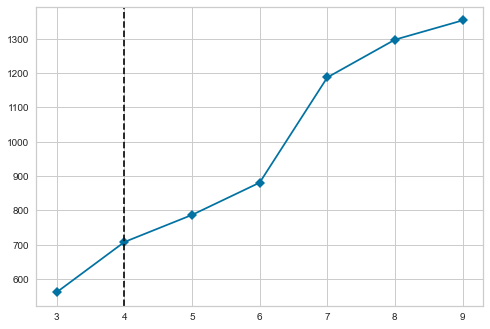

In [49]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,10), metric="calinski_harabasz", timings=False)
visualizer.fit(X)

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12a885e10>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

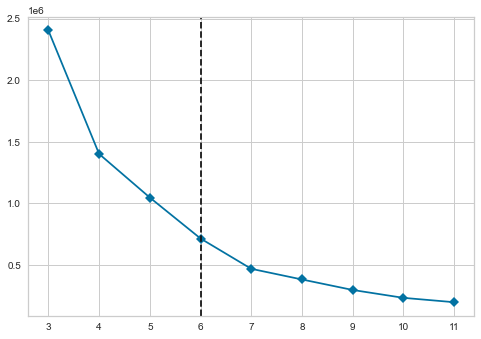

In [54]:
clustering = AgglomerativeClustering()
visualizer = KElbowVisualizer(clustering, k=(3,12), metric="distortion", timings=False)
visualizer.fit(X)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12b0b0590>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

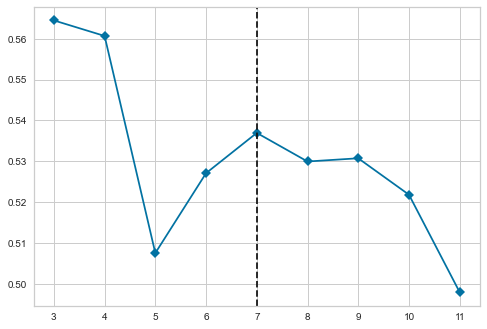

In [52]:
clustering = AgglomerativeClustering()
visualizer = KElbowVisualizer(clustering, k=(3,12), metric="silhouette", timings=False)
visualizer.fit(X)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12b10aa90>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)

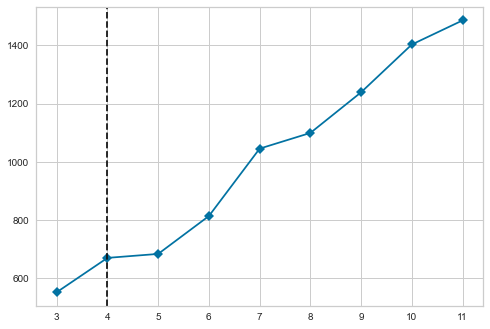

In [56]:
clustering = AgglomerativeClustering()
visualizer = KElbowVisualizer(clustering, k=(3,12), metric="calinski_harabasz", timings=False)
visualizer.fit(X)

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.